<a href="https://colab.research.google.com/github/ignyz/ParallelPrograming/blob/main/MultiprocessingOptimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Price  6183.26784945285
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Prabeges lakas 5.603095054626465
73 Iteraciju Kaina 985.7727924655824


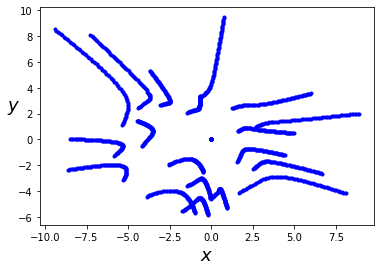

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
from functools import partial
default_point = [0., 0.]


def c(L):  # pagaminimo kaina  = C(l) = ( l - a ) ^ 2
    c = 0.
    a = 6.  # $$$
    c = (L - a)**2
    return c


def AB(A, B):
    l = 0.
    l = math.sqrt(((A[0]-B[0])**2)+((A[1]-B[1])**2))
    return l


def SUM(X):
    npnt = X.shape[0]
    rez = 0.
    total_len = 0.
    for i in range(npnt-1):
        for ii in range(i+1, npnt):
            length = AB(X[i], X[ii])
            total_len = total_len + length
            price = c(length)
            rez = rez + price
    return rez


def gradientasF(x):
    h = 1.145
    length = x.shape[0]
    gradientas = np.zeros((length, 2))
    for i in range(length):
        last_one = np.array(x)
        last_one[i] = (x[i, 0] + h, x[i, 1])
        gradientasX = (SUM(last_one) - SUM(x))/h
        last_one[i] = (x[i, 0], x[i, 1] + h)
        gradientasY = (SUM(last_one) - SUM(x)) / h
        gradientas[i] = (gradientasX, gradientasY)
    return gradientas


def gradientasFF(x, i):
    h = 1.145
    length = x.shape[0]
    #gradientas = np.zeros((length, 2))
    last_one = np.array(x)
    last_one[i] = (x[i, 0] + h, x[i, 1])
    gradientasX = (SUM(last_one) - SUM(x))/h
    last_one[i] = (x[i, 0], x[i, 1] + h)
    gradientasY = (SUM(last_one) - SUM(x)) / h
    gradientas = (gradientasX, gradientasY)
    return gradientas


if __name__ == "__main__":
    itmax = 100
    step = 0.3
    xmin = -10
    xmax = 10
    ymin = -10
    ymax = 10
    plt.xlabel("$x$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    dots_count = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    process_count = [1, 2, 3, 4]
    process_count = 2
    dots_count = 20
    np.random.seed(7)
    n = np.random.uniform(low=xmin, high=xmax, size=(dots_count, 2))
    n[0] = default_point
    #npseed
    # piesimo paruosimas #
  #  plt.plot(n[:, 1], n[:, 0], 'r.')
    #_ = plt.axis([xmin, xmax, ymin, ymax])
    #                    #

    npnt = n.shape[0]
    # kopija pradiniu tasku kad nesugadinti orginaliu duomenu
    n0 = np.zeros((npnt, 2))
    pnt = np.zeros((npnt, 2))  # naujo pigesnio tasko saugojimas
    costs = np.zeros(npnt - 1)  # kaina kiekvienam taskui saugot
    n0 = np.array(n)
    pnt = np.array(n)
    ##
    iii = 0
    print("Price ", SUM(pnt))
    old_price = SUM(pnt)
    latest_price = -999.
    gradientas = gradientasF(n0)
    ccc = np.arange(len(n))
    print(ccc)
    #pool = mp.Pool(processes=process_count)
    start_time = time.time()
    while iii < itmax and old_price > latest_price:
        iii = iii + 1
        normal = LA.norm(gradientas)
        deltax = gradientas / normal * step
        pnt[0] = [0., 0.]
        old_price = SUM(pnt)
        length = pnt.shape[0]
        for i in range(length):
            pnt[0] = [0., 0.]
            a = pnt[i, 0] - deltax[i, 0]
            b = pnt[i, 1] - deltax[i, 1]
            pnt[i] = [a, b]
        plt.plot(pnt[:, 1], pnt[:, 0], 'b.')
        plt.draw()
        latest_price = SUM(pnt)
        #func = partial(gradientasFF, pnt)
        #gradientas = pool.map(func, ccc)
        gradientas = gradientasF(pnt)
        #print(gradientas, gradus)
        # plt.pause(30)
    elapsed_time = time.time() - start_time
    print("Prabeges lakas", elapsed_time)

    # piesimas #
    print(iii, "Iteraciju Kaina", SUM(pnt))
    #plt.plot(n[:, 1], n[:, 0], 'r.')
    #plt.plot(pnt[:, 1], pnt[:, 0], 'g.')
    # plt.show()
    pool.close()
    pool.join()


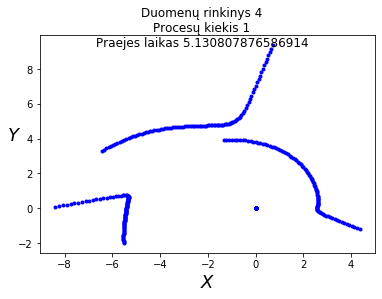

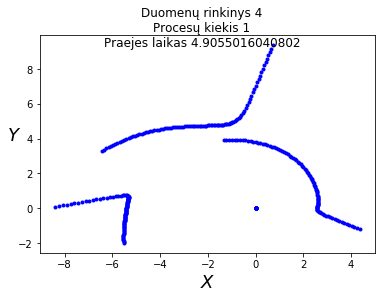

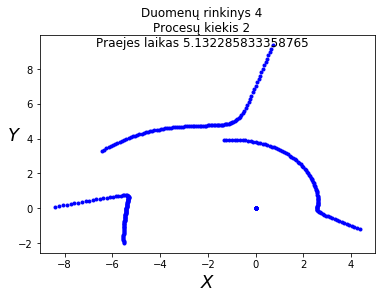

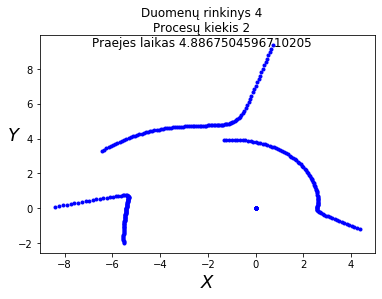

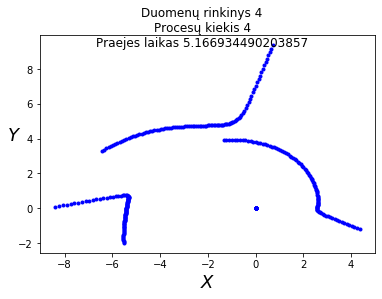

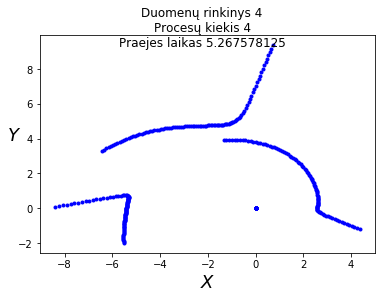

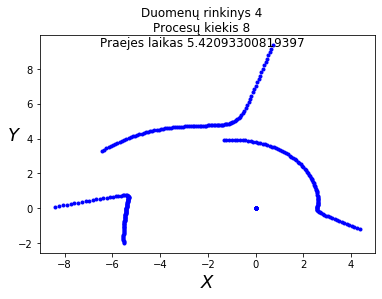

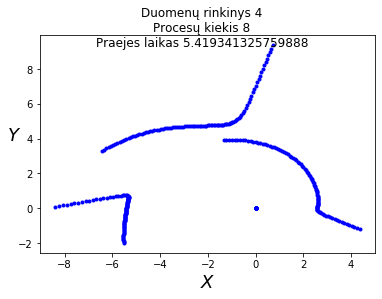

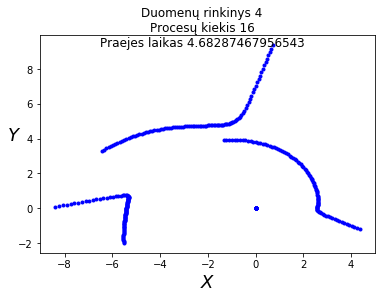

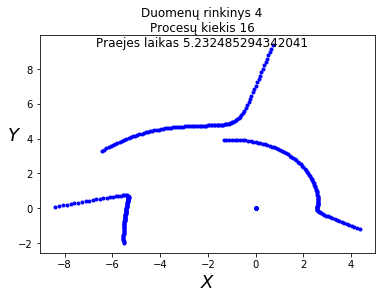

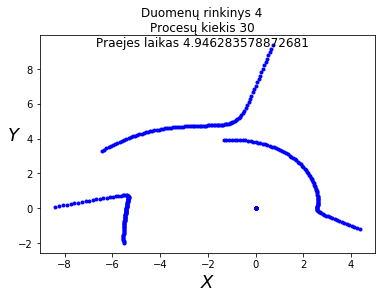

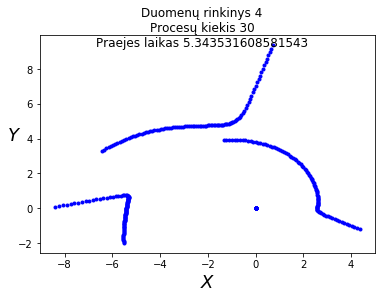

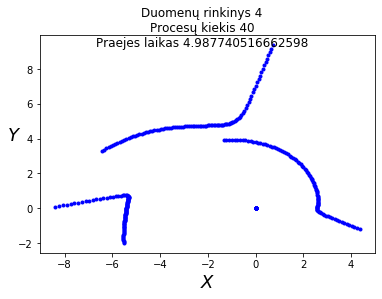

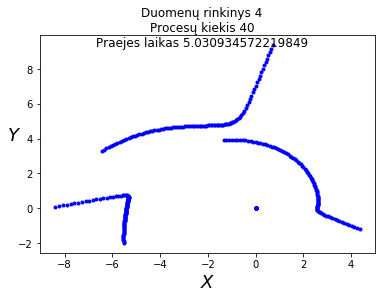

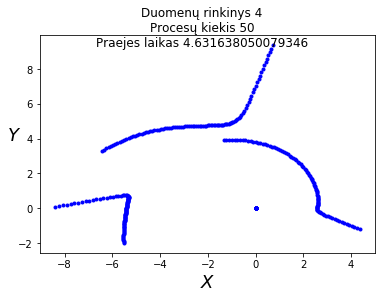

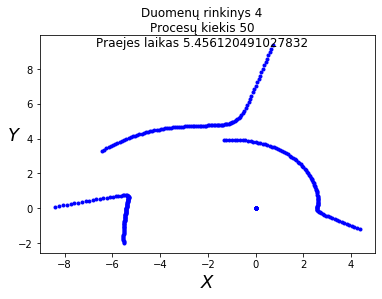

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 4     |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  5.130807876586914   |  7.651573393320999   |
|                      |          1           |   4.9055016040802    |  7.651573393320999   |
|                      |     Average time     |  5.018154740333557   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  5.132285833358765   |  7.651573393320999   |
|                      |          2           |  4.8867504596710205  |  7.651573393320999   |
|                      |     Average time     |  5.009518146514893   |                      |
| -------------------- | -------------------- | ------------

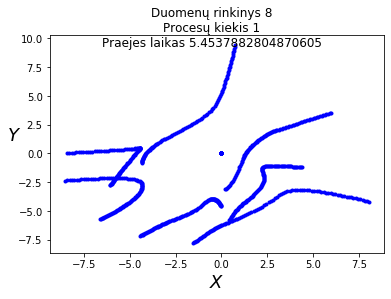

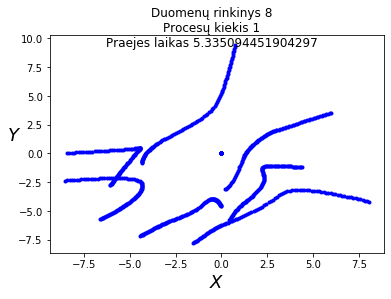

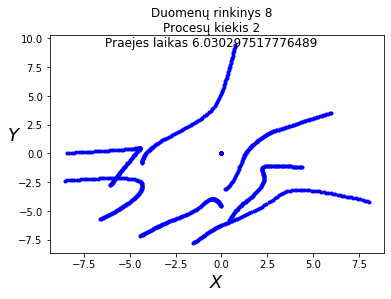

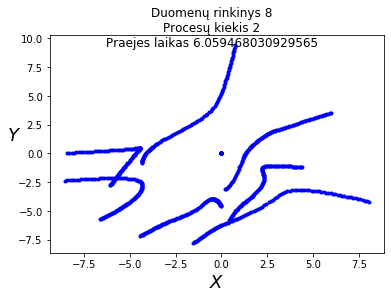

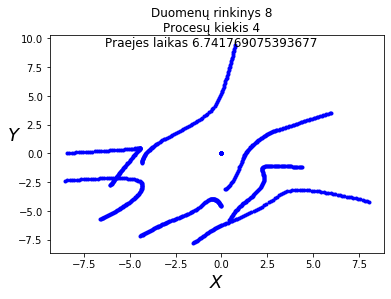

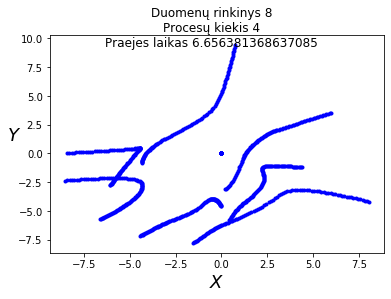

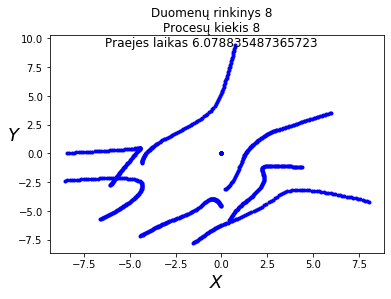

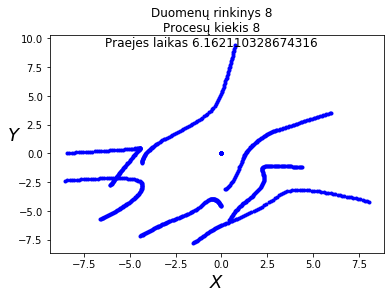

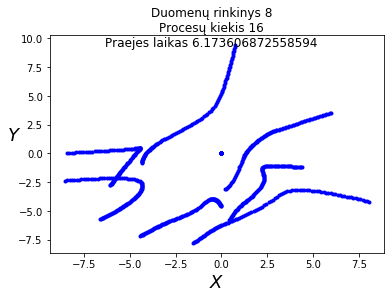

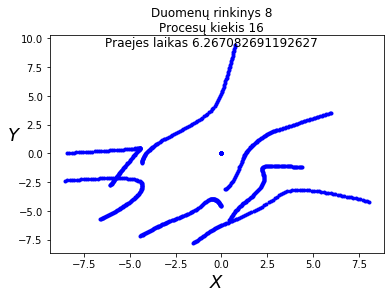

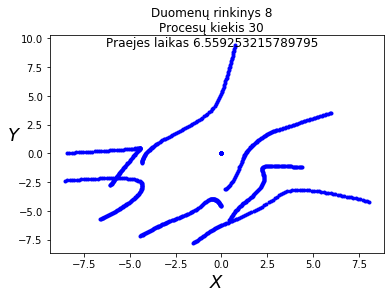

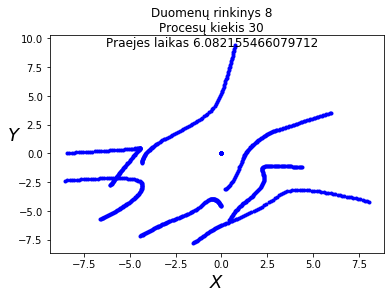

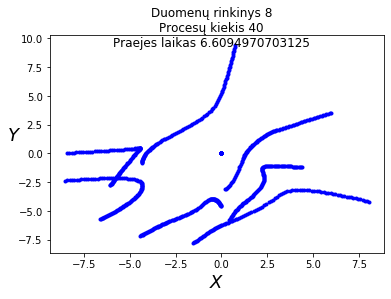

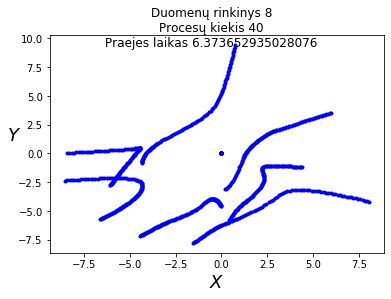

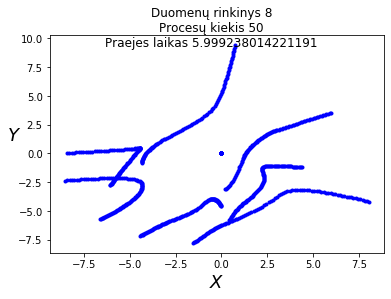

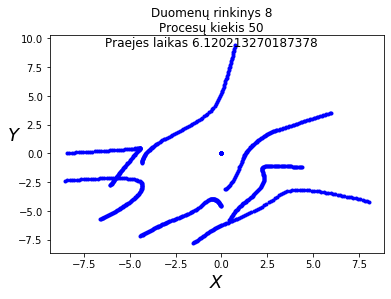

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 8     |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  5.4537882804870605  |  103.95846534419823  |
|                      |          1           |  5.335094451904297   |  103.95846534419823  |
|                      |     Average time     |  5.394441366195679   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  6.030297517776489   |  103.95846534419823  |
|                      |          2           |  6.059468030929565   |  103.95846534419823  |
|                      |     Average time     |  6.044882774353027   |                      |
| -------------------- | -------------------- | ------------

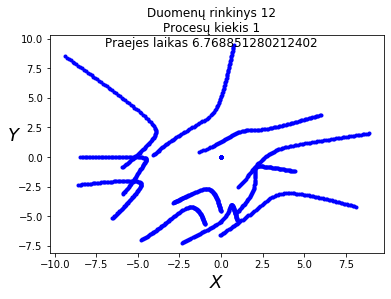

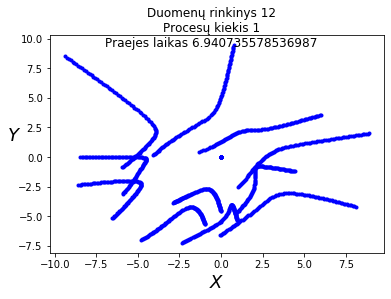

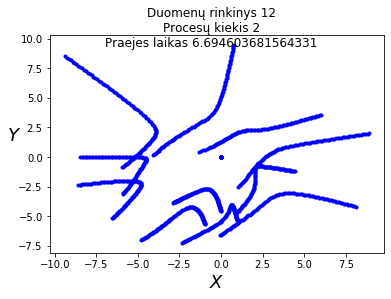

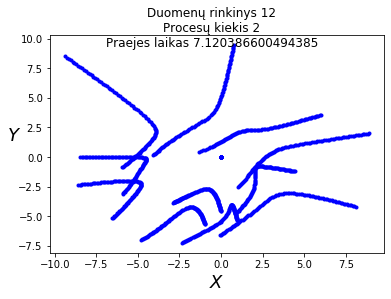

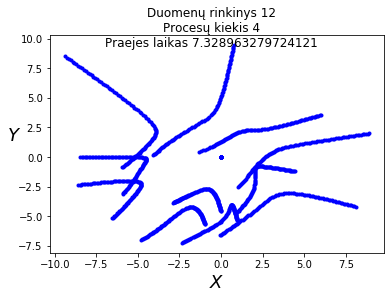

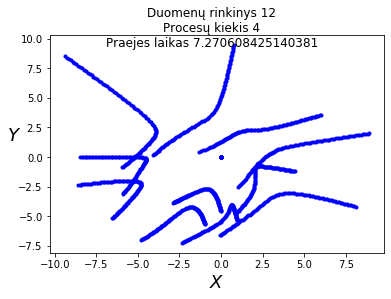

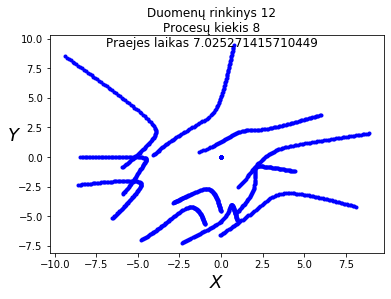

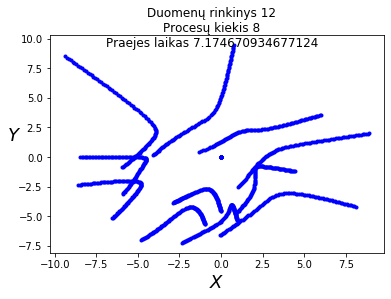

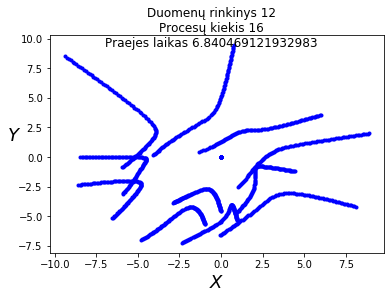

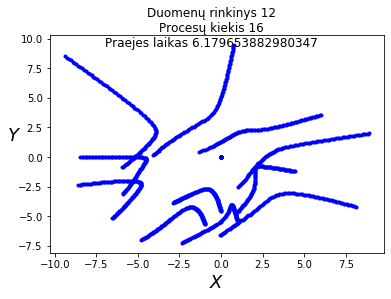

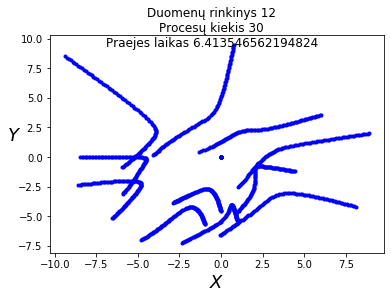

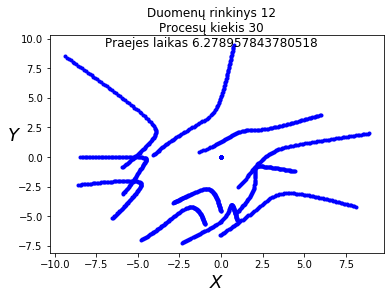

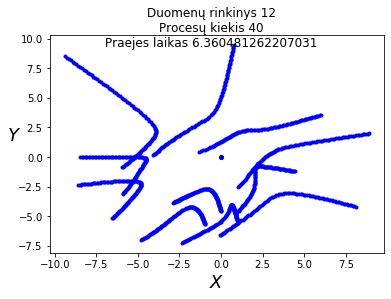

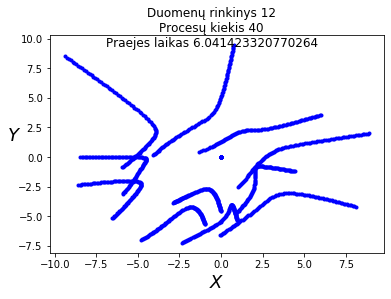

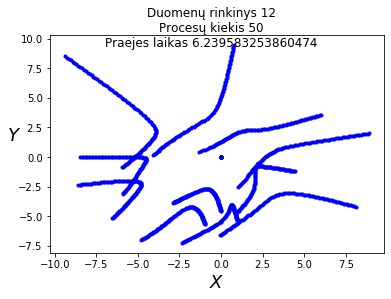

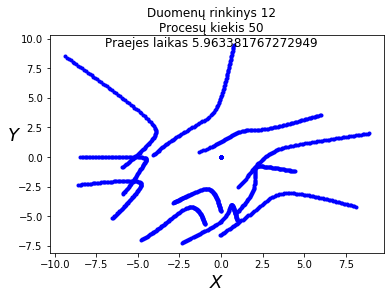

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 12    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  6.768851280212402   |   291.736669810574   |
|                      |          1           |  6.940735578536987   |   291.736669810574   |
|                      |     Average time     |  6.854793429374695   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  6.694603681564331   |   291.736669810574   |
|                      |          2           |  7.120386600494385   |   291.736669810574   |
|                      |     Average time     |  6.907495141029358   |                      |
| -------------------- | -------------------- | ------------

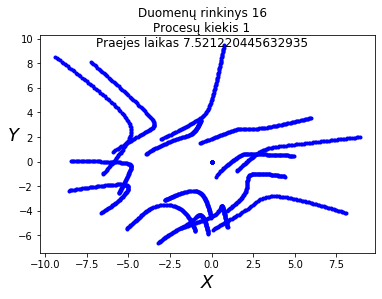

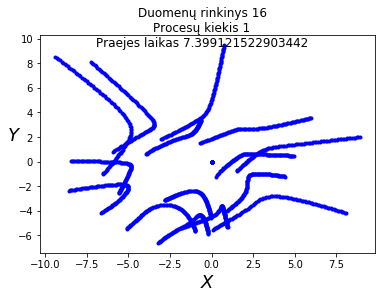

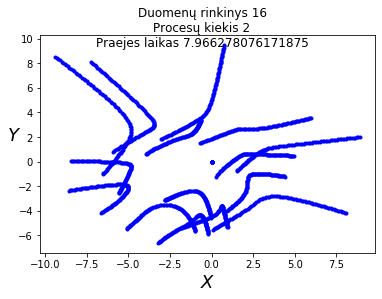

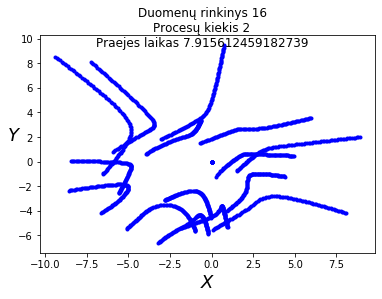

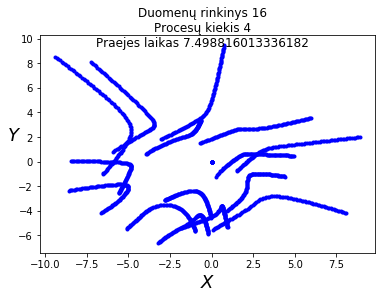

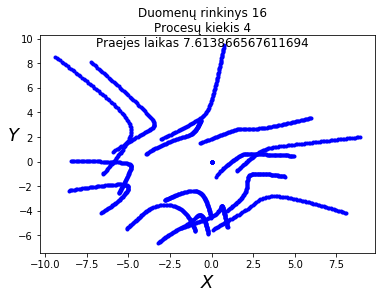

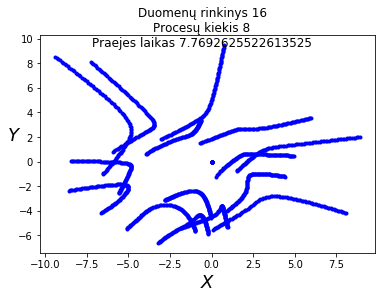

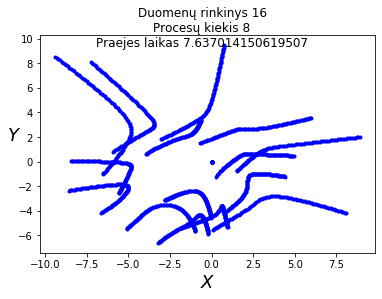

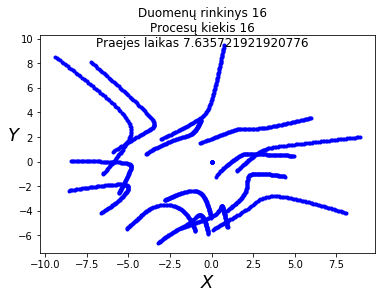

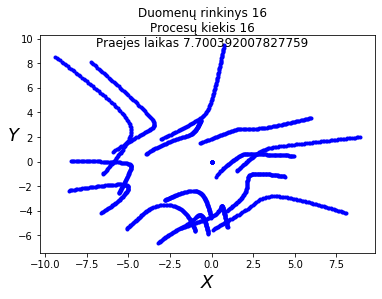

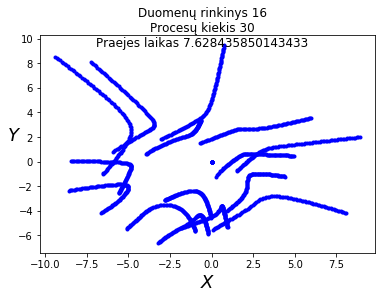

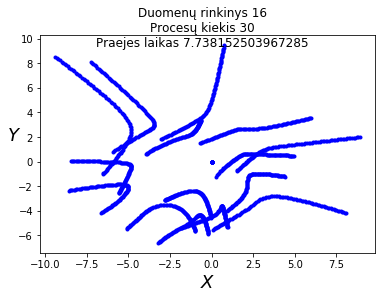

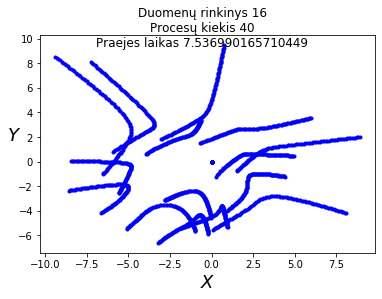

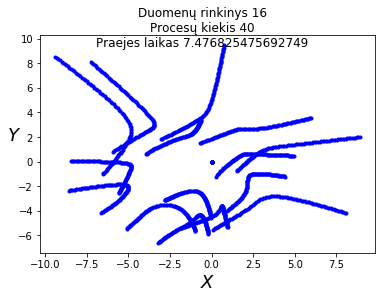

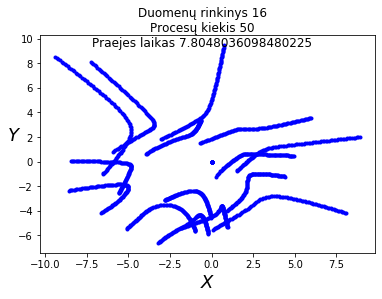

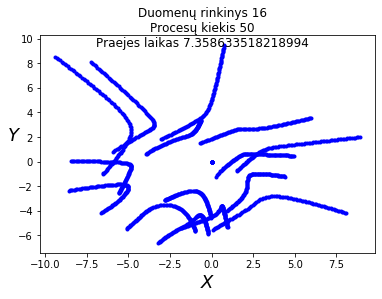

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 16    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  7.521220445632935   |  592.5976996911561   |
|                      |          1           |  7.399121522903442   |  592.5976996911561   |
|                      |     Average time     |  7.4601709842681885  |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  7.966278076171875   |  592.5976996911561   |
|                      |          2           |  7.915612459182739   |  592.5976996911561   |
|                      |     Average time     |  7.940945267677307   |                      |
| -------------------- | -------------------- | ------------

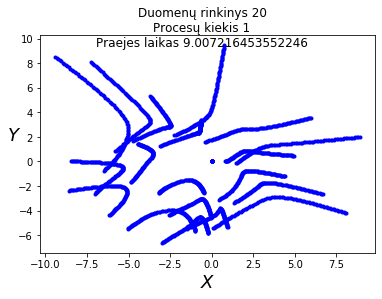

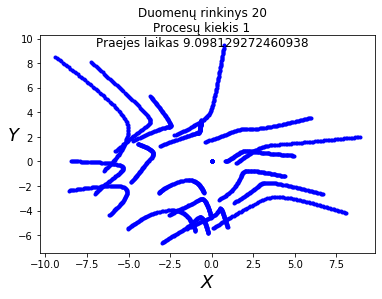

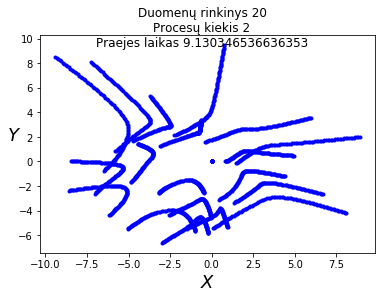

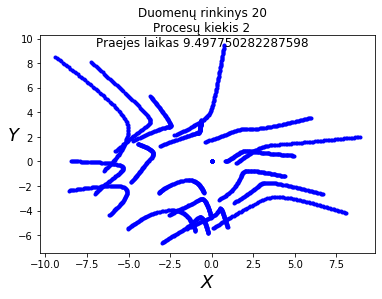

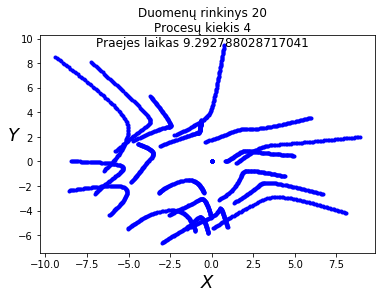

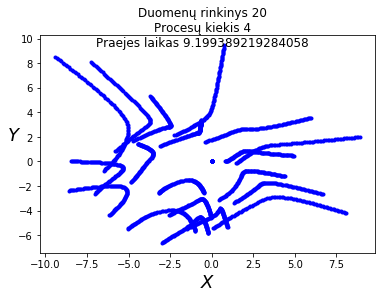

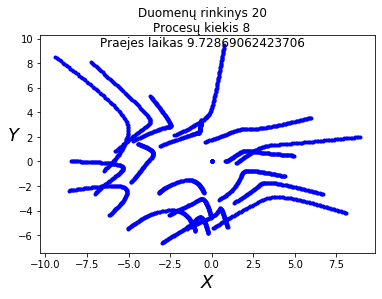

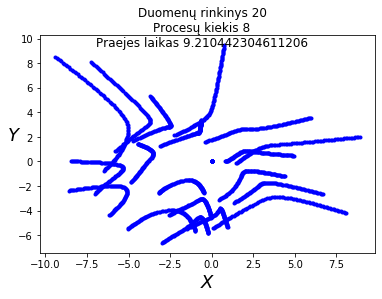

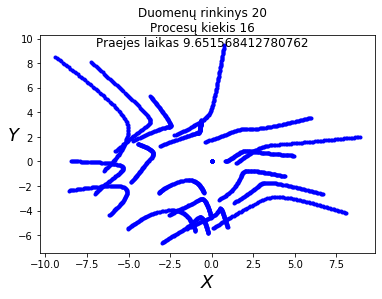

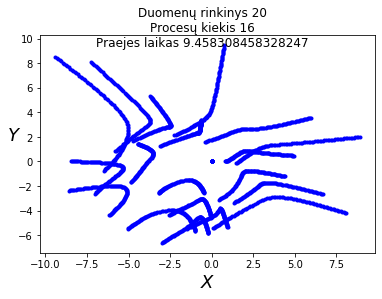

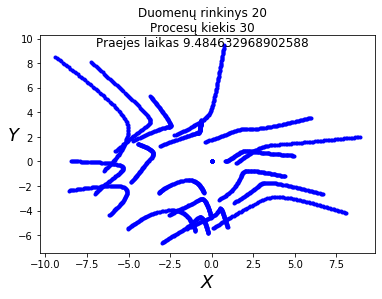

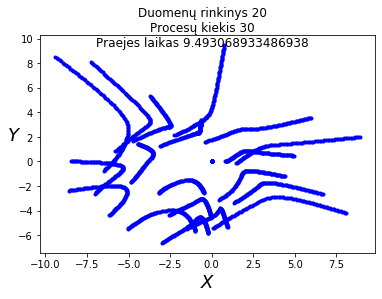

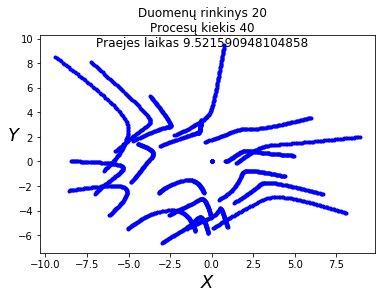

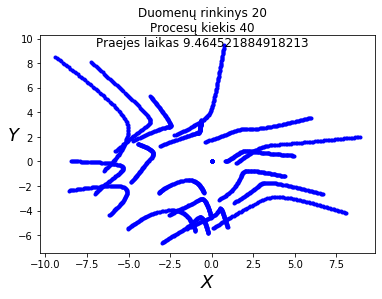

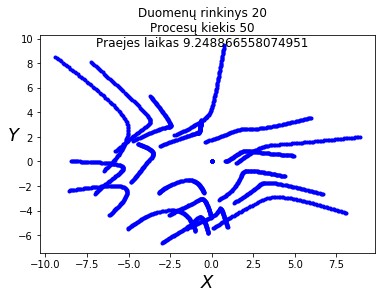

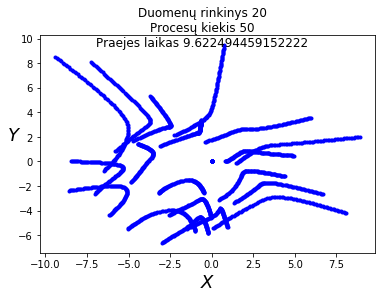

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 20    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  9.007216453552246   |  996.0300149549776   |
|                      |          1           |  9.098129272460938   |  996.0300149549776   |
|                      |     Average time     |  9.052672863006592   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  9.130346536636353   |  996.0300149549776   |
|                      |          2           |  9.497750282287598   |  996.0300149549776   |
|                      |     Average time     |  9.314048409461975   |                      |
| -------------------- | -------------------- | ------------

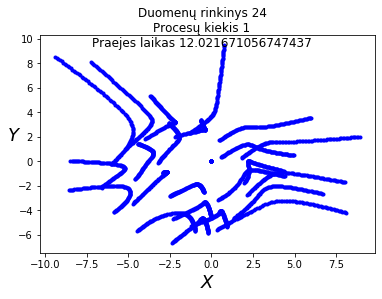

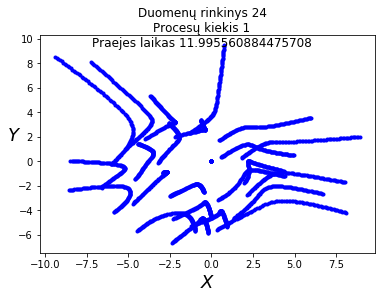

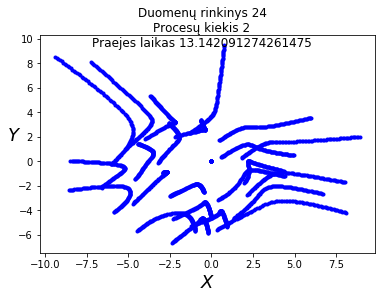

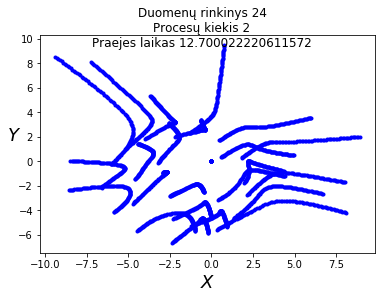

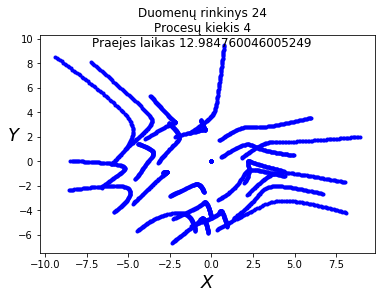

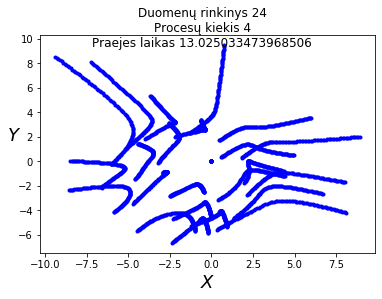

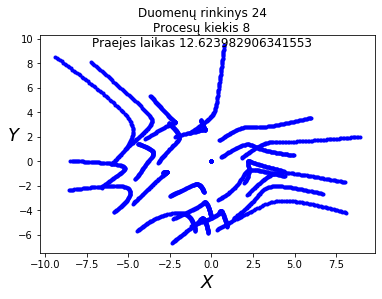

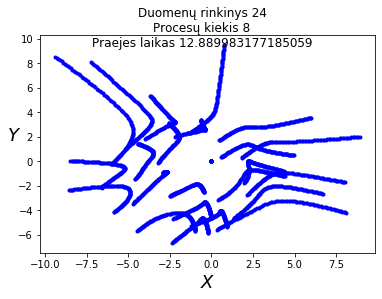

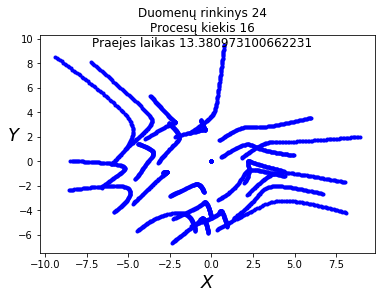

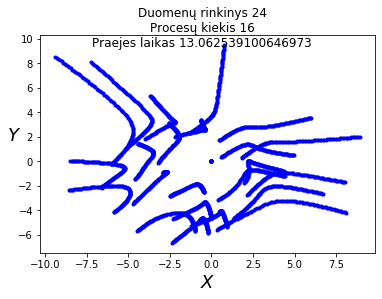

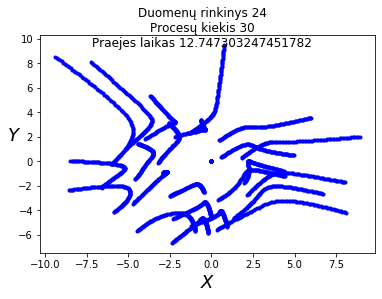

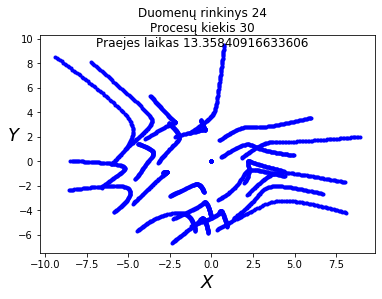

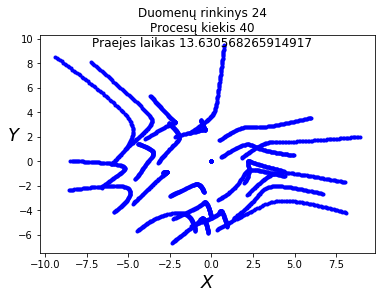

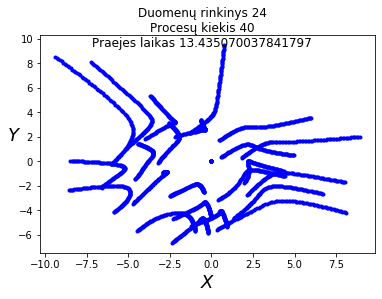

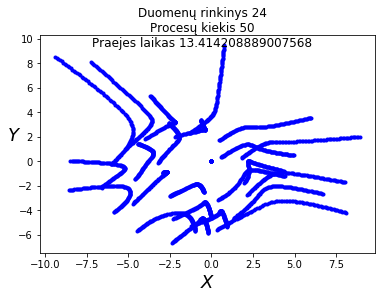

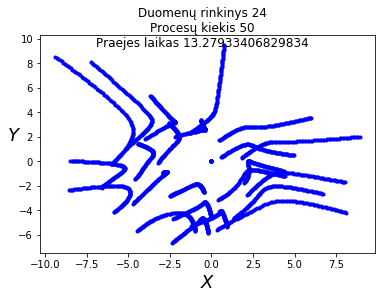

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 24    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  12.021671056747437  |  1485.1772914635908  |
|                      |          1           |  11.995560884475708  |  1485.1772914635908  |
|                      |     Average time     |  12.008615970611572  |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  13.142091274261475  |  1485.1772914635908  |
|                      |          2           |  12.700022220611572  |  1485.1772914635908  |
|                      |     Average time     |  12.921056747436523  |                      |
| -------------------- | -------------------- | ------------

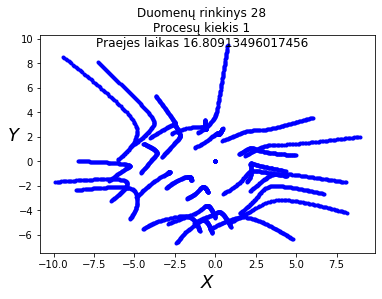

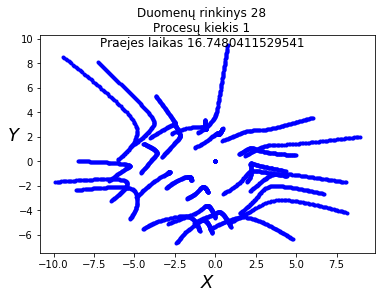

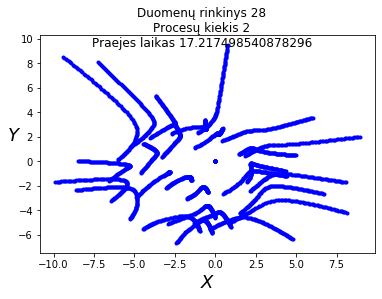

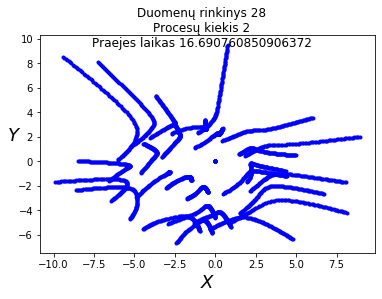

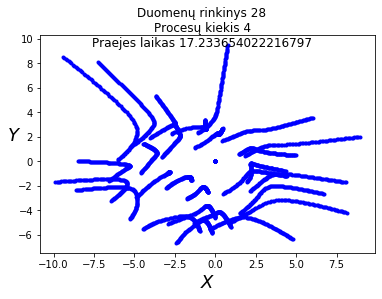

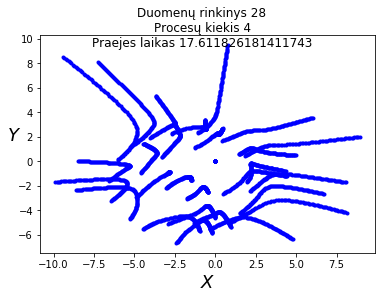

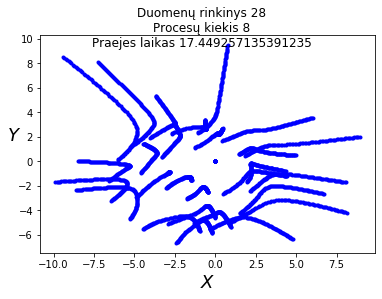

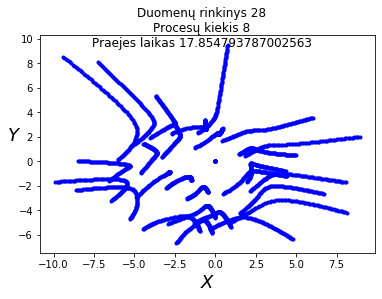

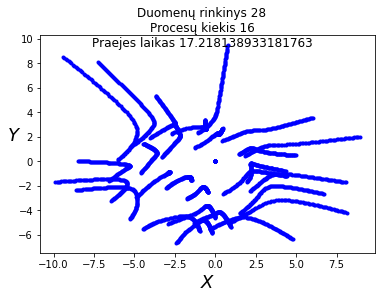

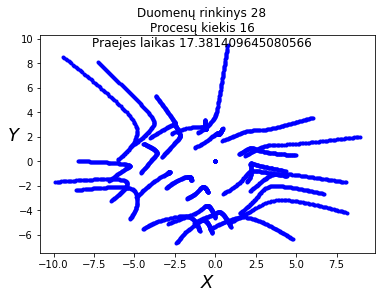

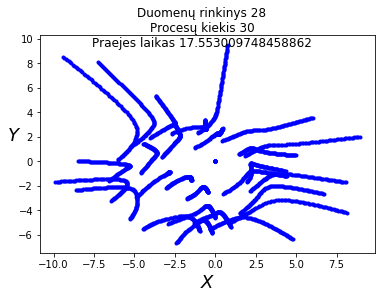

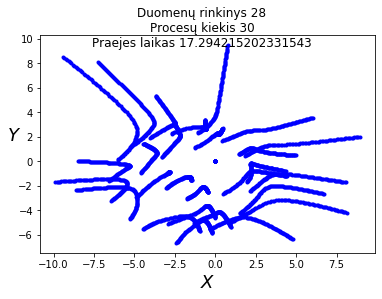

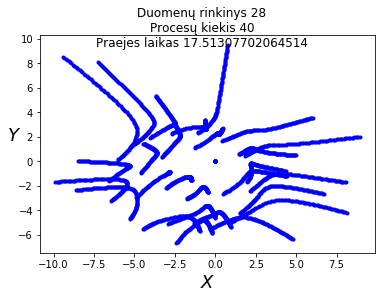

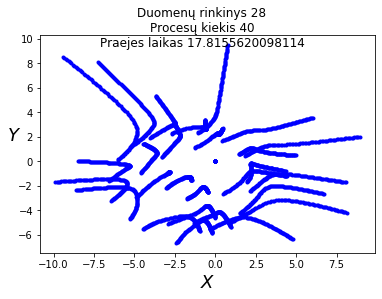

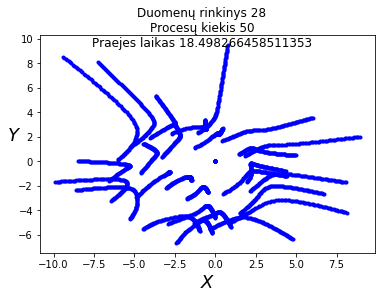

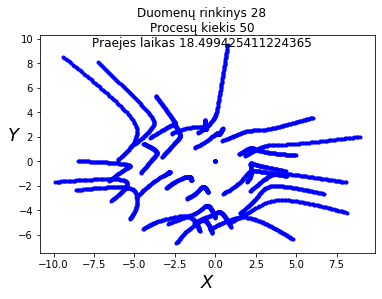

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 28    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  16.80913496017456   |  2081.8069858146773  |
|                      |          1           |   16.7480411529541   |  2081.8069858146773  |
|                      |     Average time     |  16.77858805656433   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  17.217498540878296  |  2081.8069858146773  |
|                      |          2           |  16.690760850906372  |  2081.8069858146773  |
|                      |     Average time     |  16.954129695892334  |                      |
| -------------------- | -------------------- | ------------

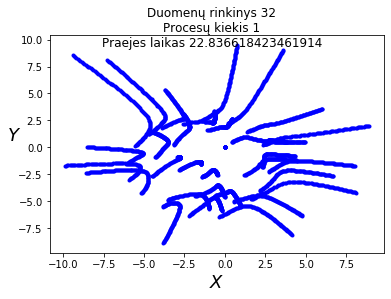

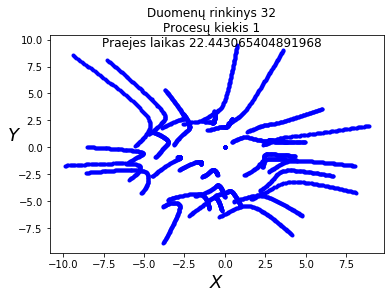

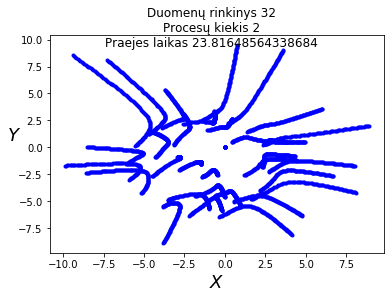

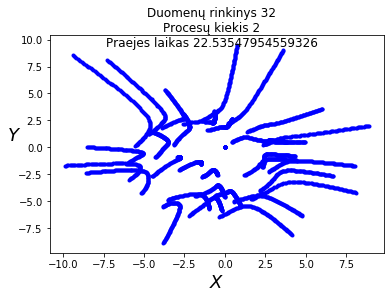

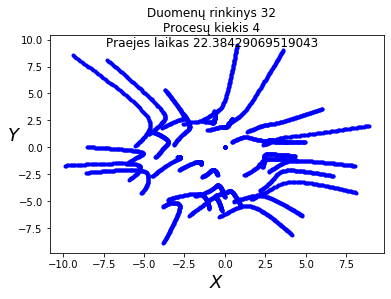

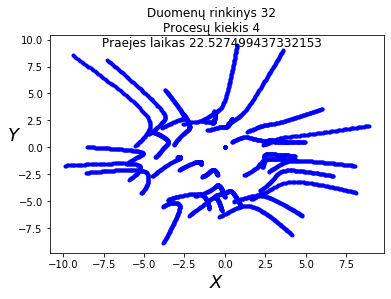

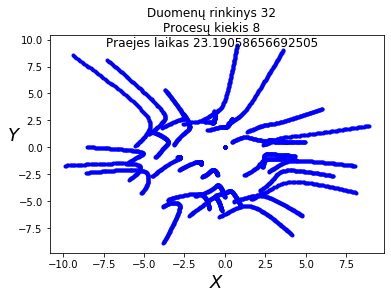

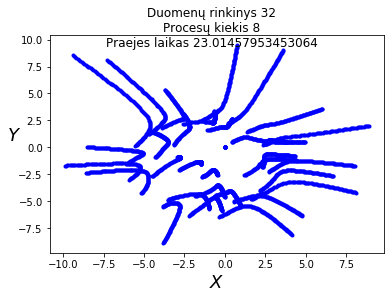

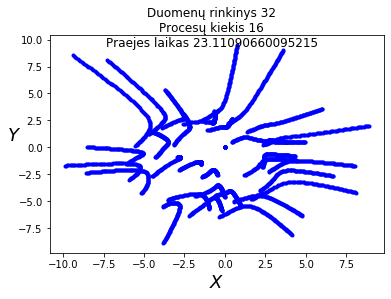

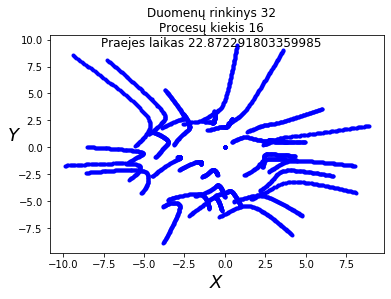

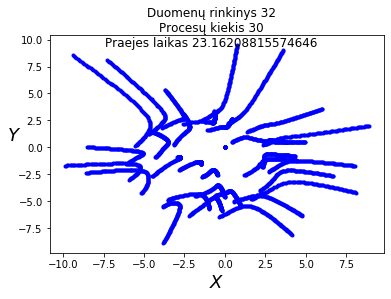

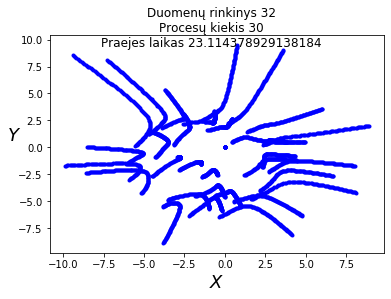

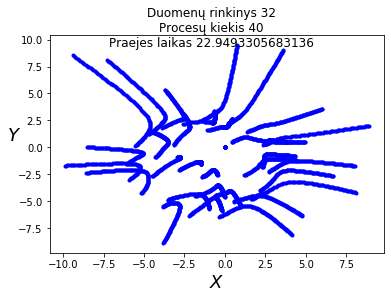

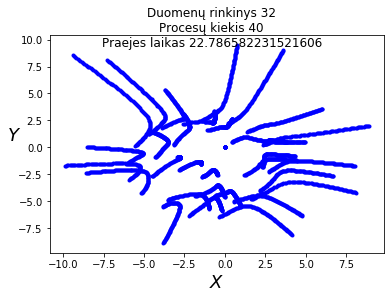

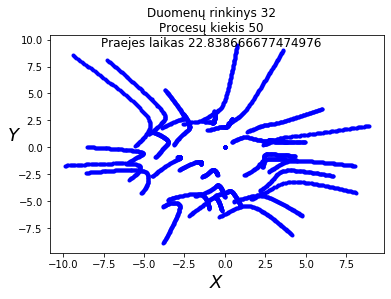

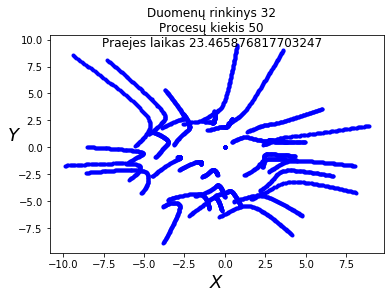

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 32    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  22.836618423461914  |  2793.166820695076   |
|                      |          1           |  22.443065404891968  |  2793.166820695076   |
|                      |     Average time     |  22.63984191417694   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  23.81648564338684   |  2793.166820695076   |
|                      |          2           |  22.53547954559326   |  2793.166820695076   |
|                      |     Average time     |  23.17598259449005   |                      |
| -------------------- | -------------------- | ------------

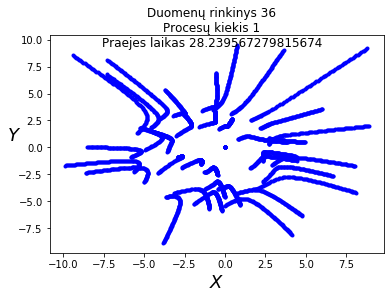

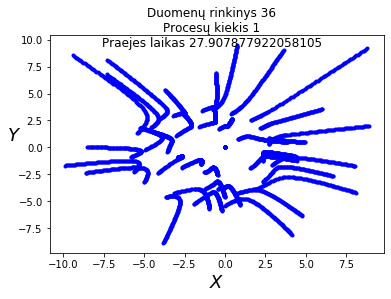

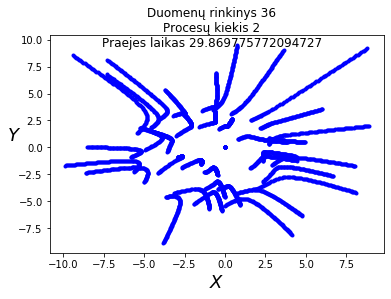

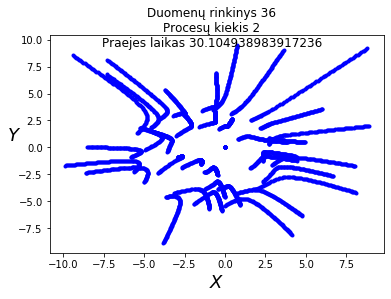

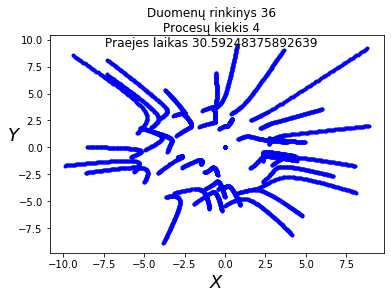

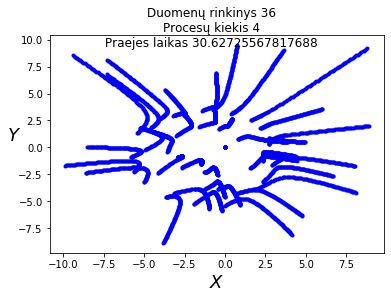

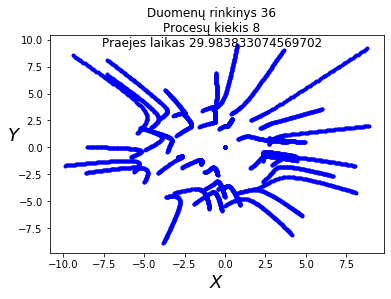

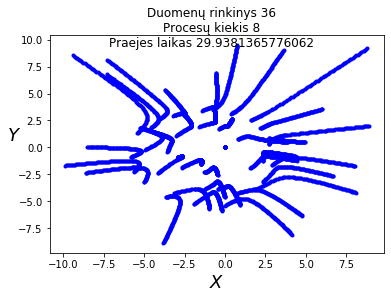

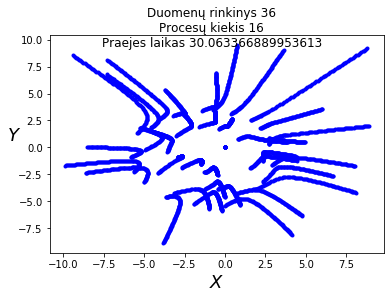

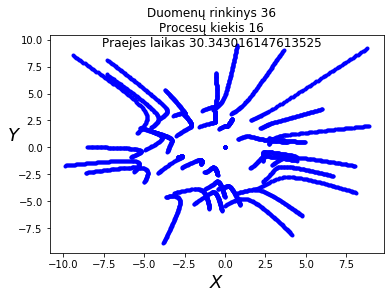

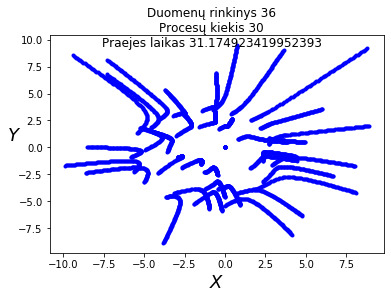

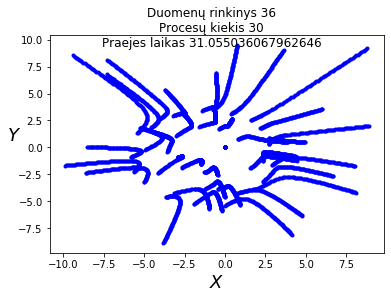

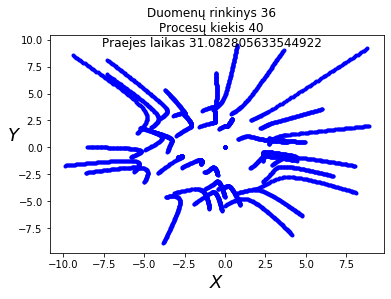

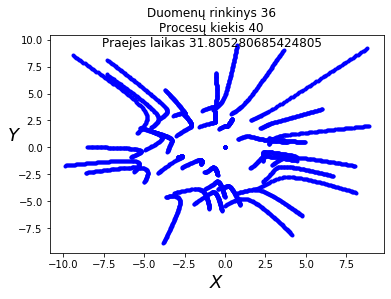

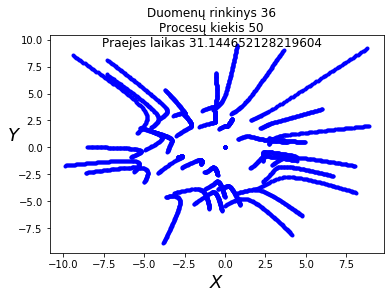

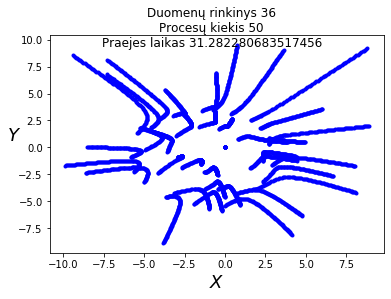

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 36    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  28.239567279815674  |  3593.176255920303   |
|                      |          1           |  27.907877922058105  |  3593.176255920303   |
|                      |     Average time     |  28.07372260093689   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  29.869775772094727  |  3593.176255920303   |
|                      |          2           |  30.104938983917236  |  3593.176255920303   |
|                      |     Average time     |  29.98735737800598   |                      |
| -------------------- | -------------------- | ------------

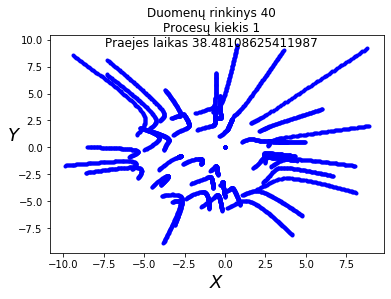

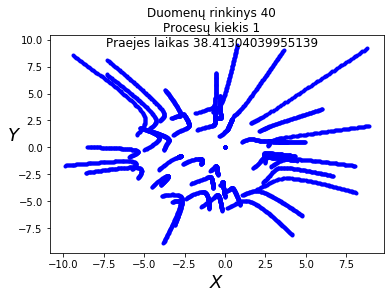

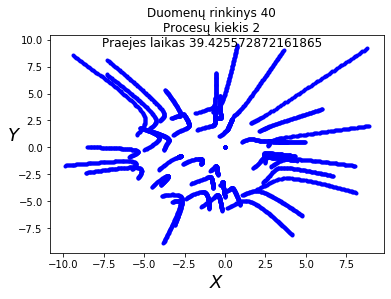

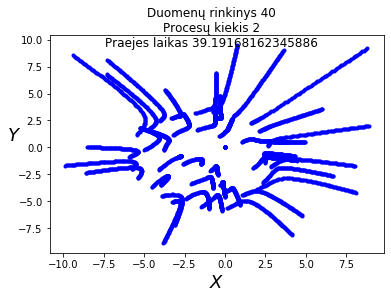

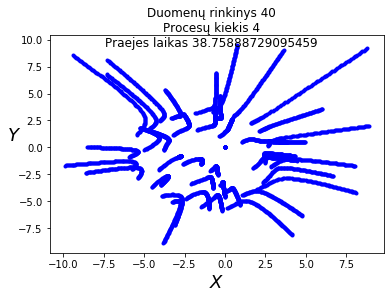

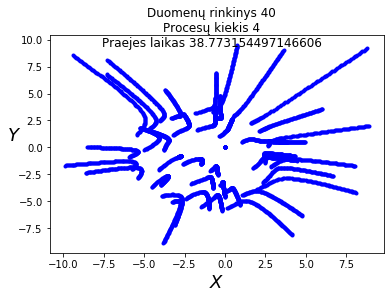

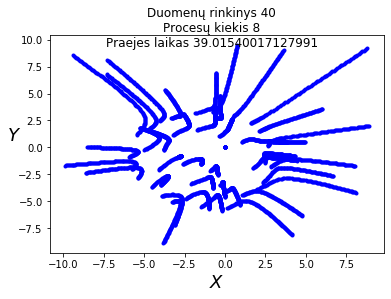

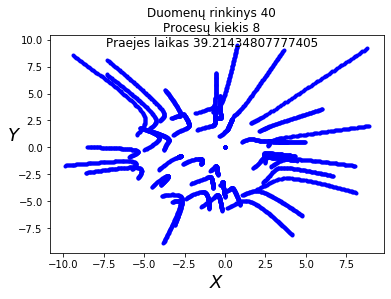

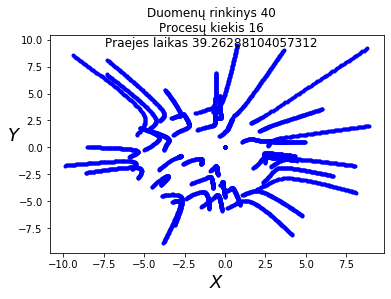

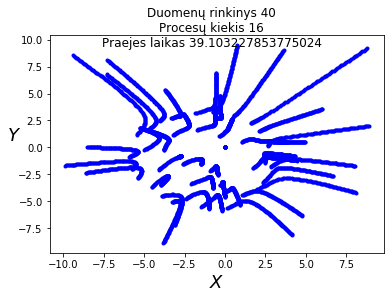

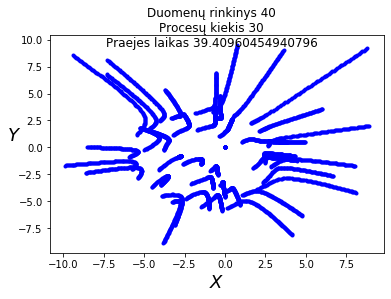

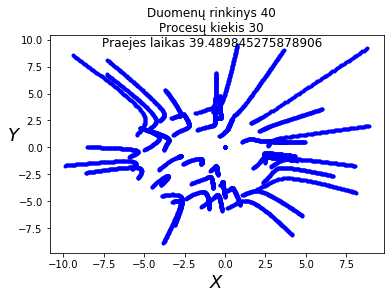

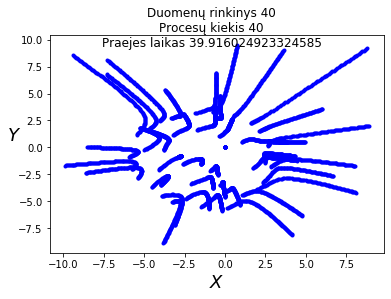

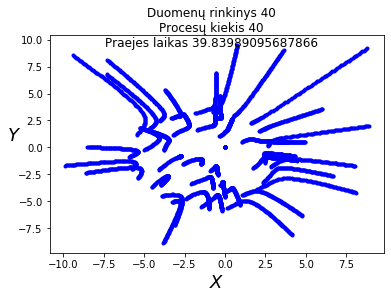

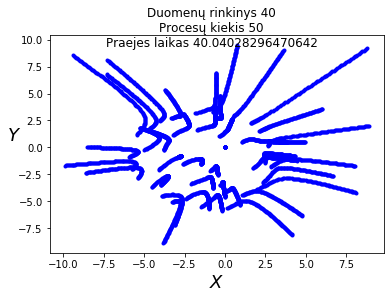

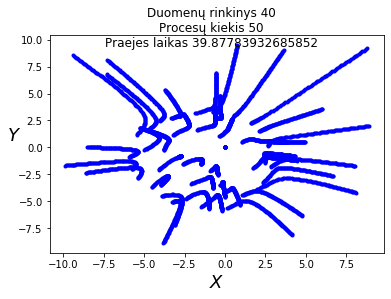

+----------------------+----------------------+----------------------+----------------------+
|    Data size = 40    |    Threads count     |     Elapsed time     |        Result        |
+----------------------+----------------------+----------------------+----------------------+
|                      |          1           |  38.48108625411987   |  4497.898321866517   |
|                      |          1           |  38.41304039955139   |  4497.898321866517   |
|                      |     Average time     |  38.44706332683563   |                      |
| -------------------- | -------------------- | -------------------- | -------------------- |
|                      |          2           |  39.425572872161865  |  4497.898321866517   |
|                      |          2           |  39.19168162345886   |  4497.898321866517   |
|                      |     Average time     |  39.308627247810364  |                      |
| -------------------- | -------------------- | ------------

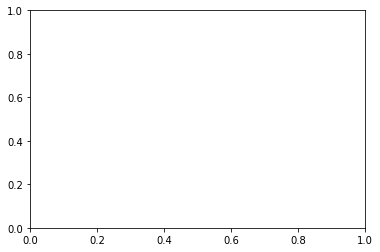

In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
from functools import partial
from prettytable import PrettyTable


def c(L):  # pagaminimo kaina = C(l) = ( l - a ) ^ 2
    c = 0.
    a = 6.  # $$$
    c = (L - a) ** 2
    return c


def AB(A, B):
    l = 0.
    l = math.sqrt(((A[0] - B[0]) ** 2) + ((A[1] - B[1]) ** 2))
    return l


def SUM(X):
    npnt = X.shape[0]
    rez = 0.
    total_len = 0.
    for i in range(npnt - 1):
        for ii in range(i + 1, npnt):
            length = AB(X[i], X[ii])
            total_len = total_len + length
            price = c(length)
            rez = rez + price
    return rez


def gradientasFF(x, i):
    h = 1.145
    length = x.shape[0]
    last_one = np.array(x)
    last_one[i] = (x[i, 0] + h, x[i, 1])
    gradientasX = (SUM(last_one) - SUM(x)) / h
    last_one[i] = (x[i, 0], x[i, 1] + h)
    gradientasY = (SUM(last_one) - SUM(x)) / h
    gradientas = (gradientasX, gradientasY)
    return gradientas


default_point = [0., 0.]
itmax = 100
step = 0.3
xmin = -10
xmax = 10
ymin = -10
ymax = 10
seed_num = 7
repeat_average = 2

if __name__ == "__main__":

   
    plt.ion()
    
    plt.show(block=False)
    dots_count = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    process_count = [1, 2, 4, 8,16,30,40,50]
    text_file = open("Output.txt", "w")

    for dc in range(len(dots_count)):

        #print("Process count = " + str(dots_count[dc]) + "\n")
        text_file.write("Process count = " + str(dots_count[dc]) + "\n")
        t = PrettyTable(['Data size = '+str(dots_count[dc]),
                        'Threads count', 'Elapsed time', 'Result'])
         
        average_time_sum = 0
        total_time = 0.
        for pc in range(len(process_count)):
            #print(" ",process_count[pc]," processors/threads count")
            # print("------------------------")
            avg_time = 0
            for avg in range(repeat_average):
                np.random.seed(seed_num)
                n = np.random.uniform(low=xmin, high=xmax,
                                      size=(dots_count[dc], 2))
                n[0] = default_point

                npnt = n.shape[0]
                pnt = np.array(n)
                
                #plt.set_title('Duomenų rinkinys '+str(dots_count[dc])+ ' Procesų kiekis'+process_count[pc])
                #print("Start price ", SUM(pnt))
                ccc = np.arange(len(n))
                pool = mp.Pool(processes=process_count[pc])
                start_time = time.time()
                iii = 0

                while iii < itmax:
                    iii = iii + 1
                    func = partial(gradientasFF, pnt)
                    gradientas = pool.map(func, ccc)
                    normal = LA.norm(gradientas)
                    deltax = gradientas / normal * step
                    pnt[0] = [0., 0.]
                    length = pnt.shape[0]
                    for i in range(length):
                        pnt[0] = [0., 0.]
                        a = pnt[i, 0] - deltax[i, 0]
                        b = pnt[i, 1] - deltax[i, 1]
                        pnt[i] = [a, b]
                    plt.plot(pnt[:, 1], pnt[:, 0], 'b.')
                    plt.draw()

                elapsed_time = time.time() - start_time
                total_time = total_time +elapsed_time
                #print("Rasta mažiausia kaina",SUM(pnt))
                avg_time = avg_time + elapsed_time
                pool.close()
                pool.join()
                plt.xlabel("$X$", fontsize=18)
                plt.ylabel("$Y$", rotation=0, fontsize=18)
                plt.suptitle('Duomenų rinkinys '+str(dots_count[dc])+ '\nProcesų kiekis '+str(process_count[pc])+'\nPraejes laikas '+str(elapsed_time))
                plt.pause(0.001)
                plt.cla()
                #
                # show()
                t.add_row(["", process_count[pc], elapsed_time, SUM(pnt)])
                # plt.plot(process_count[pc],elapsed_time,'ro')
            average_time = avg_time / repeat_average
            #print(average_time)
            t.add_row(["", "Average time",average_time , ""])
            t.add_row(["--------------------", "--------------------", "--------------------", "--------------------" ])
            
            text_file.write(str(average_time) + "\n")
            average_time_sum =average_time_sum+average_time
            
        t.add_row(["", "Total average time", average_time_sum, ""])   
        t.add_row(["", "Total time", total_time, ""])    
        print(t)
        # plt.show()
    
    text_file.close()


Process count = 4

Rasta mažiausia kaina 7.651573393320999


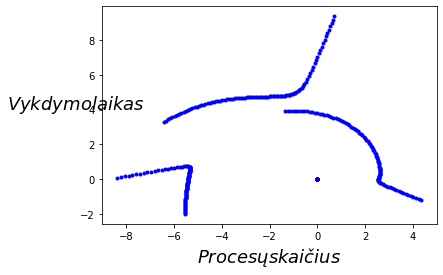

Rasta mažiausia kaina 7.651573393320999


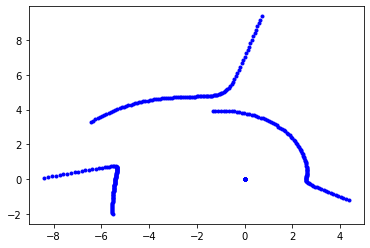

3.4963444471359253
Rasta mažiausia kaina 7.651573393320999


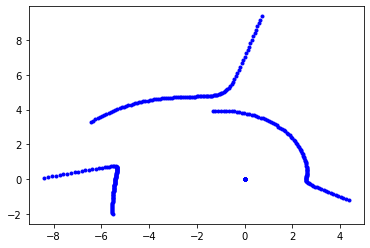

Rasta mažiausia kaina 7.651573393320999


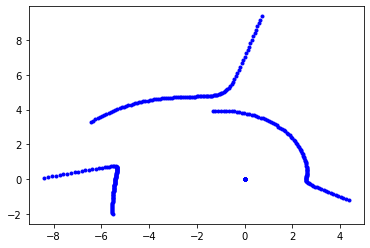

3.4394103288650513


Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/proces

KeyboardInterrupt: ignored

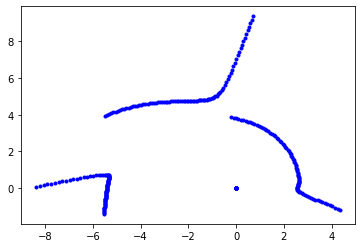

Process ForkPoolWorker-13:
Process ForkPoolWorker-12:
Process ForkPoolWorker-14:
Process ForkPoolWorker-11:
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:


In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
from functools import partial
from prettytable import PrettyTable


def c(L):  # pagaminimo kaina = C(l) = ( l - a ) ^ 2
    c = 0.
    a = 6.  # $$$
    c = (L - a) ** 2
    return c


def AB(A, B):
    l = 0.
    l = math.sqrt(((A[0] - B[0]) ** 2) + ((A[1] - B[1]) ** 2))
    return l


def SUM(X):
    npnt = X.shape[0]
    rez = 0.
    total_len = 0.
    for i in range(npnt - 1):
        for ii in range(i + 1, npnt):
            length = AB(X[i], X[ii])
            total_len = total_len + length
            price = c(length)
            rez = rez + price
    return rez


def gradientasFF(x, i):
    h = 1.145
    length = x.shape[0]
    last_one = np.array(x)
    last_one[i] = (x[i, 0] + h, x[i, 1])
    gradientasX = (SUM(last_one) - SUM(x)) / h
    last_one[i] = (x[i, 0], x[i, 1] + h)
    gradientasY = (SUM(last_one) - SUM(x)) / h
    gradientas = (gradientasX, gradientasY)
    return gradientas


default_point = [0., 0.]
itmax = 100
step = 0.3
xmin = -10
xmax = 10
ymin = -10
ymax = 10
seed_num = 7
repeat_average = 2

if __name__ == "__main__":

    plt.xlabel("$Procesų skaičius$", fontsize=18)
    plt.ylabel("$Vykdymo laikas$", rotation=0, fontsize=18)
    dots_count = [4, 8, 12, 16, 20, 24, 28, 32, 36, 40]
    #process_count = [1, 2, 3, 4, 5, 6, 7, 8, 9,
    #                 10, 11, 12,14,16,20,24]
    #process_count = [1, 4, 8,12,16,20,24]
    process_count = [1, 2, 4, 8,16,30,40,50]
    text_file = open("Output.txt", "w")

    for dc in range(len(dots_count)):

        print("Process count = "+str(dots_count[dc])+"\n")
        text_file.write("Process count = "+str(dots_count[dc])+"\n")
       # t = PrettyTable(['Data size = '+str(dots_count[dc]),
         #                'Threads count', 'Elapsed time'])
         
    
        for pc in range(len(process_count)):
            #print(" ",process_count[pc]," processors/threads count")
            # print("------------------------")
            avg_time = 0;
            for avg in range(repeat_average):
                np.random.seed(seed_num)
                n = np.random.uniform(low=xmin, high=xmax,
                                      size=(dots_count[dc], 2))
                n[0] = default_point

                npnt = n.shape[0]
                pnt = np.array(n)

                #print("Start price ", SUM(pnt))
                ccc = np.arange(len(n))
                pool = mp.Pool(processes=process_count[pc])
                start_time = time.time()
                iii = 0

                while iii < itmax:
                    iii = iii + 1
                    func = partial(gradientasFF, pnt)
                    gradientas = pool.map(func, ccc)
                    normal = LA.norm(gradientas)
                    deltax = gradientas / normal * step
                    pnt[0] = [0., 0.]
                    length = pnt.shape[0]
                    for i in range(length):
                        pnt[0] = [0., 0.]
                        a = pnt[i, 0] - deltax[i, 0]
                        b = pnt[i, 1] - deltax[i, 1]
                        pnt[i] = [a, b]
                    plt.plot(pnt[:, 1], pnt[:, 0], 'b.')
                    plt.draw()

                elapsed_time = time.time() - start_time
                print("Rasta mažiausia kaina",SUM(pnt))
                avg_time = avg_time + elapsed_time
                pool.close()
                pool.join()
                plt.show()
                #t.add_row(["", process_count[pc], elapsed_time])
                # plt.plot(process_count[pc],elapsed_time,'ro')
            average_time = avg_time/repeat_average
            print(average_time)
            text_file.write(str(average_time)+"\n")
            
            
        #print(t)
        # plt.show()
    
    text_file.close()


************************
+---------------+---------------+---------------------+
| Data size = 2 | Threads count |     Elapsed time    |
+---------------+---------------+---------------------+
|               |       1       |  0.4066445827484131 |
|               |       2       | 0.29096412658691406 |
|               |       3       |  0.3063828945159912 |
|               |       4       |  0.3408823013305664 |
|               |       5       | 0.37099361419677734 |
|               |       6       |  0.3573751449584961 |
|               |       7       | 0.33866357803344727 |
|               |       8       |  0.3785567283630371 |
|               |       9       |  0.3942089080810547 |
|               |       10      |  0.4105818271636963 |
|               |       11      | 0.40224599838256836 |
|               |       12      |  0.4500095844268799 |
+---------------+---------------+---------------------+


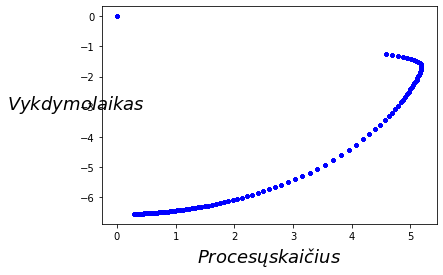

************************
+---------------+---------------+---------------------+
| Data size = 4 | Threads count |     Elapsed time    |
+---------------+---------------+---------------------+
|               |       1       | 0.39173030853271484 |
|               |       2       | 0.40157485008239746 |
|               |       3       |  0.4118776321411133 |
|               |       4       |  0.3809316158294678 |
|               |       5       | 0.41715025901794434 |
|               |       6       | 0.43445277214050293 |
|               |       7       |  0.446103572845459  |
|               |       8       | 0.44440293312072754 |
|               |       9       |  0.6848983764648438 |
|               |       10      | 0.49465274810791016 |
|               |       11      |  0.5649406909942627 |
|               |       12      |  0.545182466506958  |
+---------------+---------------+---------------------+


Process ForkPoolWorker-121:
Process ForkPoolWorker-102:
Process ForkPoolWorker-119:
Process ForkPoolWorker-74:
Process ForkPoolWorker-157:
Process ForkPoolWorker-172:
Process ForkPoolWorker-38:
Process ForkPoolWorker-78:
Process ForkPoolWorker-76:
Process ForkPoolWorker-118:
Process ForkPoolWorker-79:
Process ForkPoolWorker-81:
Process ForkPoolWorker-80:
Process ForkPoolWorker-99:
Process ForkPoolWorker-168:
Process ForkPoolWorker-167:
Process ForkPoolWorker-141:
Process ForkPoolWorker-133:
Process ForkPoolWorker-83:
Process ForkPoolWorker-75:
Process ForkPoolWorker-106:
Process ForkPoolWorker-138:
Process ForkPoolWorker-135:
Process ForkPoolWorker-120:
Process ForkPoolWorker-139:
Process ForkPoolWorker-123:
Process ForkPoolWorker-137:
Process ForkPoolWorker-98:
Process ForkPoolWorker-124:
Process ForkPoolWorker-77:
Process ForkPoolWorker-173:
Process ForkPoolWorker-153:
Process ForkPoolWorker-152:
Process ForkPoolWorker-122:
Process ForkPoolWorker-57:
Process ForkPoolWorker-101:
Proce

KeyboardInterrupt: ignored

Process ForkPoolWorker-24:
Process ForkPoolWorker-150:
Process ForkPoolWorker-23:
Process ForkPoolWorker-115:
Process ForkPoolWorker-142:
Process ForkPoolWorker-169:
Process ForkPoolWorker-166:
Process ForkPoolWorker-162:
Process ForkPoolWorker-161:


In [ ]:
import numpy as np
from numpy import linalg as LA
import numpy
import math
import matplotlib.pyplot as plt
import time
import multiprocessing as mp
from functools import partial
from prettytable import PrettyTable


def c(L):  # pagaminimo kaina = C(l) = ( l - a ) ^ 2
    c = 0.
    a = 6.  # $$$
    c = (L - a) ** 2
    return c


def AB(A, B):
    l = 0.
    l = math.sqrt(((A[0] - B[0]) ** 2) + ((A[1] - B[1]) ** 2))
    return l


def SUM(X):
    npnt = X.shape[0]
    rez = 0.
    total_len = 0.
    for i in range(npnt - 1):
        for ii in range(i + 1, npnt):
            length = AB(X[i], X[ii])
            total_len = total_len + length
            price = c(length)
            rez = rez + price
    return rez


def gradientasFF(x, i):
    h = 1.145
    length = x.shape[0]
    last_one = np.array(x)
    last_one[i] = (x[i, 0] + h, x[i, 1])
    gradientasX = (SUM(last_one) - SUM(x)) / h
    last_one[i] = (x[i, 0], x[i, 1] + h)
    gradientasY = (SUM(last_one) - SUM(x)) / h
    gradientas = (gradientasX, gradientasY)
    return gradientas


default_point = [0., 0.]
itmax = 100
step = 0.3
xmin = -10
xmax = 10
ymin = -10
ymax = 10
seed_num = 7

if __name__ == "__main__":

    plt.xlabel("$Procesų skaičius$", fontsize=18)
    plt.ylabel("$Vykdymo laikas$", rotation=0, fontsize=18)
    dots_count = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    process_count = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                     10, 11, 12]

    for dc in range(len(dots_count)):

        print("************************")
        t = PrettyTable(['Data size = '+str(dots_count[dc]),
                         'Threads count', 'Elapsed time'])
        for pc in range(len(process_count)):
            #print(" ",process_count[pc]," processors/threads count")
            # print("------------------------")
            np.random.seed(seed_num)
            n = np.random.uniform(low=xmin, high=xmax,
                                  size=(dots_count[dc], 2))
            n[0] = default_point

            npnt = n.shape[0]
            pnt = np.array(n)

            #print("Start price ", SUM(pnt))
            ccc = np.arange(len(n))
            pool = mp.Pool(processes=process_count[pc])
            start_time = time.time()
            iii = 0

            while iii < itmax:
                iii = iii + 1
                func = partial(gradientasFF, pnt)
                gradientas = pool.map(func, ccc)
                normal = LA.norm(gradientas)
                deltax = gradientas / normal * step
                pnt[0] = [0., 0.]
                length = pnt.shape[0]
                for i in range(length):
                    pnt[0] = [0., 0.]
                    a = pnt[i, 0] - deltax[i, 0]
                    b = pnt[i, 1] - deltax[i, 1]
                    pnt[i] = [a, b]
                plt.plot(pnt[:, 1], pnt[:, 0], 'b.')

            elapsed_time = time.time() - start_time
            t.add_row(["", process_count[pc], elapsed_time])
            #plt.plot(process_count[pc],elapsed_time,'ro')
        print(t)
        plt.show()
        pool.close()
        pool.join()
